# ლექცია #5

## კოდების გაშვებისთვის საჭირო ბიბლიოთეკების იმპორტები

ამ ნოუთბუქის გაშვებამდე არ დაგავიწყდეთ საჭირო დამოკიდებულებების (dependencies) დაინსტალირება, რომლებიც მოცემულია `requirements.txt` ფაილში. მარტივად, ტერმინალიდან გაუშვით:

```bash
pip install -r requirements.txt
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

## ლოჯისტიკური რეგრესია

ბევრი ML პრობლემა მოითხოვს ალბათობის შეფასებას, როგორც გამომავალ ცვლადს. ლოჯისტიკური რეგრესია არის საკმაოდ ეფექტური მექანიზმი ალბათობების გამოსათვლელად. პრაქტიკაში დაბრუნებული ალბათობა შეგვიძლია გამოვიყენოთ შემდეგი ორი გზით:

1. "as is" ("Როგორც არის")
2. ორობითში გადაყვანილი (1 და 0)

განვიხილოთ, როგორ გამოვიყენოთ ალბათობა "როგორც არის". დავუშვათ, ვქმნით ლოჯისტიკური რეგრესიის მოდელს, რათა გამოვთვალოთ ძაღლის ყეფის ალბათობა შუაღამისას:

$$p(bark | night)$$

თუ ლოჯისტიკური რეგრესიის მოდელი იპროგნოზირებს $p(bark | night) = 0.05$, შემდეგი ერთი წლის განმავლობაში, ძაღლის პატრონები დაახლოებით 18-ჯერ შეწუხდებიან ღამე ძაღლის ყეფის გამო გაღვიძებით:

$$startled = p(bark | night) \cdot nights = 0.05 \cdot 365 = 18$$

ხშირ შემთხვევაში, ლოჯისტიკური რეგრესიის პროგნოზს ორობითი კლასიფიკაციის პრობლემის გადაწყვეტაში ვიყენებთ, ანუ სადაც მიზანია სწორი პროგნოზირება ორი შესაძლო ეტიკეტიდან (მაგ., "spam" ან "not spam").

ლოჯისტიკური მოდელის შედეგი ყოველთვის 0-სა და 1-ს შორის არის. ეს ხდება **სიგმოიდური** (**sigmoid**) ფუნქციის დახმარებით:

$$y = \frac{1}{1 + e^{-x}}$$

![Sigmoid](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

თუ $x$ წარმოადგენს ლოჯისტიკური რეგრესიით გაწვრთნილი მოდელის წრფივი ფენის გამომავალ ცვლადს, მაშინ $sigmoid(x)$ მნიშვნელობა (ალბათობა) იქნება 0-დან 1-მდე. მათემატიკური თვალსაზრისით:

$$y' = \frac{1}{1 + e^{-x}}$$

სადაც:

* $y'$ არის ლოჯისტიკური რეგრესიის მოდელის შედეგი კონკრეტული მაგალითისთვის.
* $x = b + w_1x_1 + w_2x_2 + \ldots + w_nx_n$
    * $w_1, w_2, ..., w_n$ არიან მოდელის მიერ ნასწავლი წონები და $b$ არის bias.
    * $x_1, x_2, ..., x_n$ არიან შემავალი მახასიათებლები კონკრეტული მაგალითისთვის.
 
ამ ფორმულაში $x$ ასევე მოიხსენიება, როგორც _log-odds_, რადგანაც სიგმოიდის ინვერსია გვეუბნება, რომ $x$ შეიძლება განისაზღვროს, როგორც ლოგარითმი 1-იანი მნიშვნელობის მქონე ეტიკეტის (მაგ., ძაღლი ყეფს) ალბათობა გაყოფილი 0-იანი ეტიკეტის (მაგ., ძაღლი არ ყეფს) ალბათობაზე:

$$x = \log\left(\frac{y}{1-y}\right)$$

მაგალითად, თუ ჩვენ მიერ დატრენინგებული ლოჯისტიკური მოდელის მიერ ნასწავლი წონები და bias გამოიყურება ასე:

$$
\begin{align}
  b &= 1 \\
  w_1 &= 2 \\
  w_2 &= -1 \\
  w_3 &= 5
\end{align}
$$

და ერთი კონკრეტული მაგალითისთვის შემავალი მახასიათებლებია:

$$
\begin{align}
  x_1 &= 0 \\
  x_2 &= 10 \\
  x_3 &= 2
\end{align}
$$

მაშინ, log-odds იქნება:

$$b + w_1x_1 + w_2x_2 + w_3x_3 = (1) + (2)(0) + (-1)(10) + (5)(2) = 1$$

შესაბამისად, ამ მაგალითისთვის ლოჯისტიკური მოდელის პროგნოზი იქნება:

$$y' = \frac{1}{1 + e^{-1}} = 0.731$$

ანუ 73.1%.

In [2]:
b = 1
w_1 = 2
w_2 = -1
w_3 = 5

x_1 = 0
x_2 = 10
x_3 = 2

log_odds = b + w_1 * x_1 + w_2 * x_2 + w_3 * x_3
y_hat = 1 / (1 + np.exp(-log_odds))
y_hat

0.7310585786300049

ლოჯისტიკური რეგრესიის დანაკარგის ფუნქციაა **ლოგარითმული დანაკარგი** (**Log Loss**), რომელიც განისაზღვრება შემდეგნაირად:

$$\text{Log Loss} = \sum_{(x,y)\in D} -y\log(y') - (1 - y)\log(1 - y')$$

სადაც:

* $(x, y)$ არის მაგალითი, რომელშიც
    - $x$ არის მახასიათებლები, რომელსაც მოდელი იყენებს პროგნოზირებისთვის.
    - $y$ არის მაგალითის ეტიკეტი.
* $y$ არის რეალური ეტიკეტი, 0 ან 1.
* $y'$ არის პროგნოზირებული ეტიკეტი (მნიშვნელობა, რომელიც მოთავსებულია 0-სა და 1-ს შორის).

## ლოჯისტიკური რეგრესია scikit-learn-ის გამოყენებით

### ლოჯისტიკური რეგრესია ორობითი კლასიფიკაციისთვის

სიმარტივისთვის გამოვიყენოთ `scikit-learn`-ის მკერდის კიბოს მონაცემები, რომელსაც გააჩნია ორობითი ეტიკეტი, ანუ ეტიკეტი არის ან 1 ან 0.

In [3]:
breast_cancer_data = load_breast_cancer()

რადგანაც მოდელის დატრენინგება გვსურს, აუცილებელია საწყისი მონაცემების სატრენინგო და სატესტო მონაცემებად დაშლა. ამ მაგალითში მონაცემების 80% წავა სატრენინგოში, ხოლო დარჩენილი 20% - სატესტოში.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer_data.data,
    breast_cancer_data.target,
    test_size=0.2,
    stratify=breast_cancer_data.target,
    random_state=1,
)

In [5]:
print("სატრენინგო მონაცემების ზომა:", X_train.shape, y_train.shape)
print("სატესტო მონაცემების ზომა:", X_test.shape, y_test.shape)

სატრენინგო მონაცემების ზომა: (455, 30) (455,)
სატესტო მონაცემების ზომა: (114, 30) (114,)


ლოჯისტიკური რეგრესიის მოდელის შექმნა და დატრენინგება:

In [6]:
log_reg = LogisticRegression(random_state=1, max_iter=2500)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=2500, random_state=1)

მოდელის შეფასება:

In [7]:
train_preds = log_reg.predict(X_train)
test_preds = log_reg.predict(X_test)

In [8]:
print(
    f"აკურატულობა სატრენინგო მონაცემებზე: {accuracy_score(y_train, train_preds) * 100:.2f}%"
)
print(
    f"აკურატულობა სატესტო მონაცემებზე: {accuracy_score(y_test, test_preds) * 100:.2f}%"
)

აკურატულობა სატრენინგო მონაცემებზე: 96.48%
აკურატულობა სატესტო მონაცემებზე: 95.61%


გავიხსენოთ თუ რა იყო დაბნეულობის მატრიცა (confusion matrix):

![Confusion Matrix](https://images.datacamp.com/image/upload/v1701364260/image_5baaeac4c0.png)

In [9]:
conf_matrix = confusion_matrix(y_test, test_preds)
conf_matrix

array([[38,  4],
       [ 1, 71]])

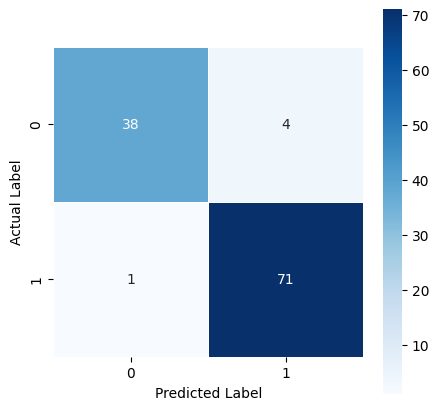

In [10]:
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, linewidths=0.5, square=True, cmap="Blues")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

### ლოჯისტიკური რეგრესია მრავალკლასიანი კლასიფიკაციისთვის

ამ მაგალითისთვის გამოვიყენებთ ხელნაწერი ციფრების მონაცემებს `scikit-learn`-დან. თითოეული მონაცემი წარმოადგენს 8x8 სურათს, რომელზეც გამოსახულია ციფრი (ანუ მთელი მნიშვნელობა 0-დან 9-ის ჩათვლით).

In [11]:
digits_data = load_digits()

In [12]:
digits_data.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
digits_data.data[0].shape

(64,)

როგორც ზედა შედეგიდან ვხედავთ, თითოული მონაცემი წარმოდგენილია 64 მახასიათებლით, რომელიც რეალურად ზემოთ ნახსენები 8x8 მატრიცაა (სურათი).

უფრო კარგად რომ აღვიქვათ, გამოვსახოთ მონაცემები:

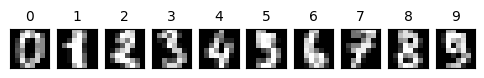

In [14]:
plt.figure(figsize=(6, 4))
for ind, (image, label) in enumerate(
    zip(digits_data.data[:10], digits_data.target[:10])
):
    plt.subplot(1, 10, ind + 1)
    plt.tick_params(
        axis="both",
        bottom=False,
        top=False,
        left=False,
        labelbottom=False,
        labelleft=False,
    )
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title(label, fontsize=10)

რადგანაც მოდელის დატრენინგება გვსურს, აუცილებელია საწყისი მონაცემების სატრენინგო და სატესტო მონაცემებად დაშლა. ამ მაგალითში მონაცემების 80% წავა სატრენინგოში, ხოლო დარჩენილი 20% - სატესტოში.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    digits_data.data,
    digits_data.target,
    test_size=0.2,
    stratify=digits_data.target,
    random_state=1,
)

In [16]:
print("სატრენინგო მონაცემების ზომა:", X_train.shape, y_train.shape)
print("სატესტო მონაცემების ზომა:", X_test.shape, y_test.shape)

სატრენინგო მონაცემების ზომა: (1437, 64) (1437,)
სატესტო მონაცემების ზომა: (360, 64) (360,)


ლოჯისტიკური რეგრესიის მოდელის შექმნა და დატრენინგება:

In [17]:
log_reg = LogisticRegression(random_state=1, max_iter=160)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=160, random_state=1)

მოდელის შეფასება:

In [18]:
train_preds = log_reg.predict(X_train)
test_preds = log_reg.predict(X_test)

In [19]:
print(
    f"აკურატულობა სატრენინგო მონაცემებზე: {accuracy_score(y_train, train_preds) * 100:.2f}%"
)
print(
    f"აკურატულობა სატესტო მონაცემებზე: {accuracy_score(y_test, test_preds) * 100:.2f}%"
)

აკურატულობა სატრენინგო მონაცემებზე: 100.00%
აკურატულობა სატესტო მონაცემებზე: 96.11%


In [20]:
conf_matrix = confusion_matrix(y_test, test_preds)
conf_matrix

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0, 34,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0, 33,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  1],
       [ 0,  1,  0,  0,  1,  1,  0,  0, 31,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 35]])

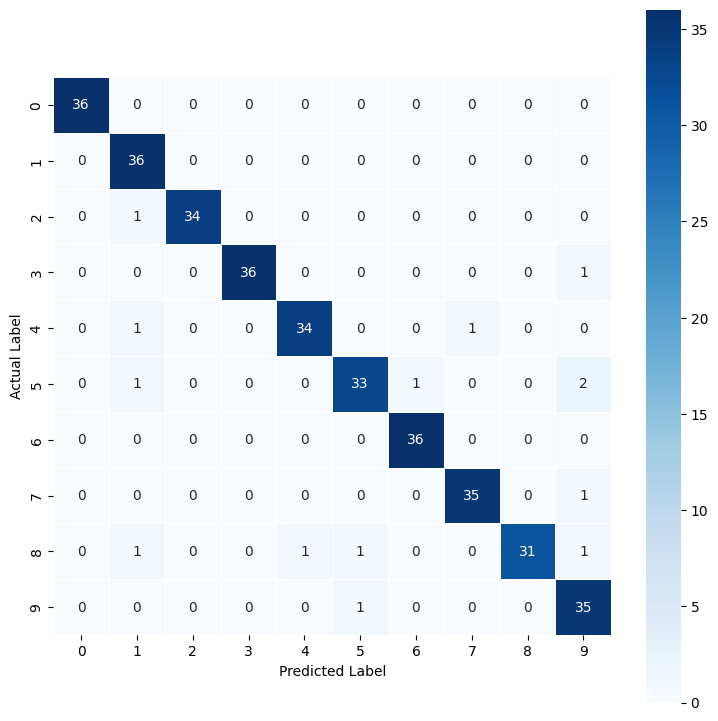

In [21]:
plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, linewidths=0.5, square=True, cmap="Blues")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()